In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.ticker import FixedLocator

In [3]:
df = pd.read_csv("../Mental health 2023./CSV/data.csv")
df.shape

(3661, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 8 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                 --------------  -----  
 0   countries                                                                                                                                              3660 non-null   object 
 1   year                                                                                                                                                   3660 non-null   float64
 2   Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)    3660 non-null   fl

In [5]:
#count, mean, standard deviation, minimum, and quartiles for each numerical column.
df.describe()

,year,"Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)","Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)",Unnamed: 5,Unnamed: 6,Unnamed: 7
count,3660.000000,3660.000000,3660.000000,3660.000000,0.0,0.0,0.0
mean,2009.500000,22.058415,25.639590,18.670464,NaN,NaN,NaN
std,5.767069,8.170809,9.727201,7.530725,NaN,NaN,NaN
min,2000.000000,7.300000,9.600000,4.400000,NaN,NaN,NaN
25%,2004.750000,16.100000,18.000000,13.100000,NaN,NaN,NaN
50%,2009.500000,21.700000,24.500000,18.300000,NaN,NaN,NaN
75%,2014.250000,26.600000,31.500000,23.300000,NaN,NaN,NaN
max,2019.000000,56.000000,64.100000,47.800000,NaN,NaN,NaN


In [6]:
# check for missing values
df.isnull().sum()

countries                                                                                                                                                   1
year                                                                                                                                                        1
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)         1
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)         1
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)       1
Unnamed: 5                                                                                                                                               3661
Unnamed: 6                                          

In [7]:
#unique values
df.nunique()

countries                                                                                                                                                183
year                                                                                                                                                      20
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(both)      391
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(male)      439
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease(female)    366
Unnamed: 5                                                                                                                                                 0
Unnamed: 6                                                

In [8]:
min_year = df['year'].min()
max_year = df['year'].max()

print(f"Zakres lat: {min_year} - {max_year}")


Zakres lat: 2000.0 - 2019.0


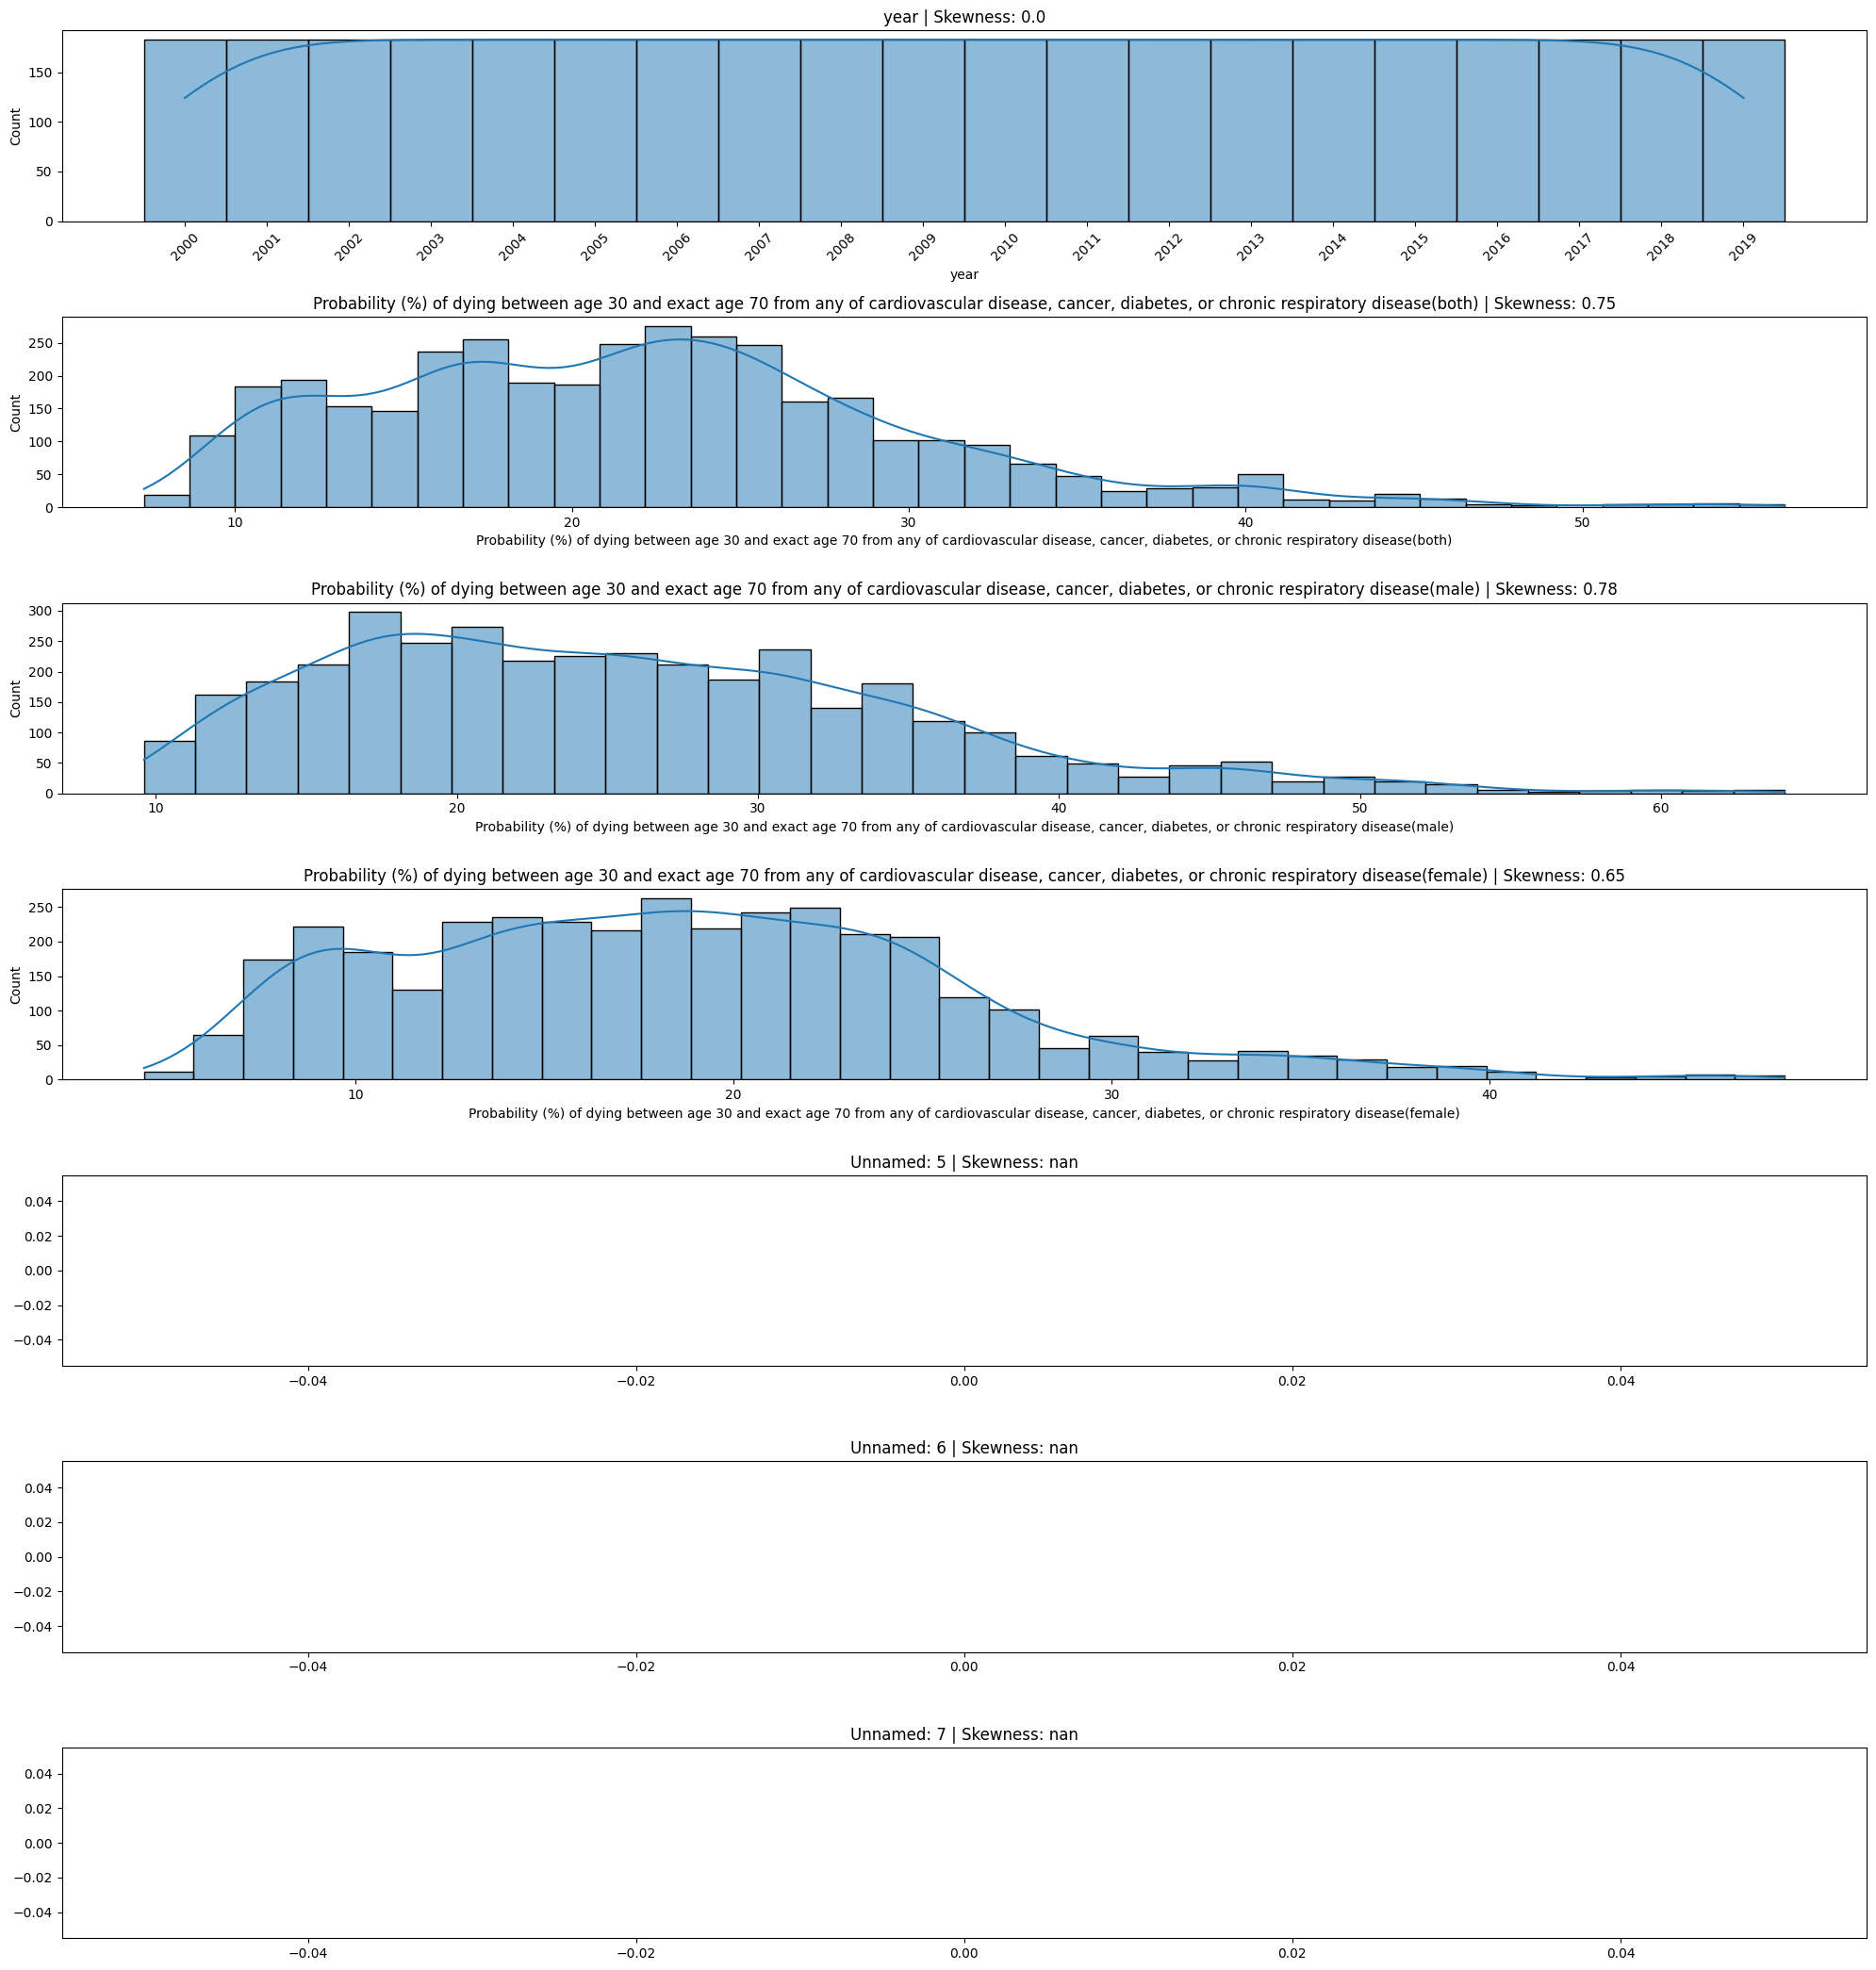

In [9]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    if feature == 'year':
        sns.histplot(df[feature].dropna(), kde=True, discrete=True)
        unique_years = df['year'].dropna().sort_values().unique()  
        plt.xticks(unique_years, rotation=45) 
    else:
        sns.histplot(df[feature].dropna(), kde=True)
    



plt.tight_layout()
plt.show()
